In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-12-07 14:52:05] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-07 14:52:05] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-07 14:52:05] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-12-07 14:52:07] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-07 14:52:07] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-07 14:52:07] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-07 14:52:07] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-12-07 14:52:08] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-07 14:52:08] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
# Initialize a list to store models
models_m = []

# Loop over each path and load the model
for path in finetuned_model_path_m:
    model_m = my_nas.load(path_model,path)  # Load the model using the current path
    models_m.append(model_m)




[2023-12-07 14:52:09] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 14:52:10] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 14:52:11] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 14:52:12] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 14:52:13] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth EMA checkpoint.


In [5]:
evaluation_results_m = []

for model in models_m:
    metrics_m = my_nas.get_map_scores(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_m.append(metrics_m)

model yolo_nas_m loaded


/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
[2023-12-07 14:52:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:52:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:52

In [6]:
evaluation_results_m


[{'mAP@50': 0.42217331744316033, 'mAP@50:95': 0.1900697509845672},
 {'mAP@50': 0.43409615506922994, 'mAP@50:95': 0.18247655413305505},
 {'mAP@50': 0.4115183184311955, 'mAP@50:95': 0.1695807422587115},
 {'mAP@50': 0.44011240677715224, 'mAP@50:95': 0.1861026532397091},
 {'mAP@50': 0.41276399736668556, 'mAP@50:95': 0.16815904973307347}]

In [7]:
path_model = 'yolo_nas_l' 



finetuned_model_path_l = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth"]



In [8]:
models_l = []

# Loop over each path and load the model
for path in finetuned_model_path_l:
    model_l = my_nas.load(path_model,path)  
    models_l.append(model_l)

[2023-12-07 14:56:00] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 14:56:02] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 14:56:03] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 14:56:05] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 14:56:06] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth EMA checkpoint.


In [9]:
evaluation_results_l = []

for model in models_l:
    metrics_l = my_nas.get_map_scores(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_l.append(metrics_l)

model yolo_nas_l loaded


[2023-12-07 14:56:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:56:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:56:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:56:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:56:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:56:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 14:56:10] INFO -

In [10]:
evaluation_results_l
#evaluation_results_m

[{'mAP@50': 0.4274878846662909, 'mAP@50:95': 0.17514857648179502},
 {'mAP@50': 0.4707243211415806, 'mAP@50:95': 0.20083298473380745},
 {'mAP@50': 0.447266858488944, 'mAP@50:95': 0.18682633956879227},
 {'mAP@50': 0.4913793697310913, 'mAP@50:95': 0.2110440757262011},
 {'mAP@50': 0.43082275621645244, 'mAP@50:95': 0.17588451587456505}]

In [11]:
evaluation_results_m

[{'mAP@50': 0.42217331744316033, 'mAP@50:95': 0.1900697509845672},
 {'mAP@50': 0.43409615506922994, 'mAP@50:95': 0.18247655413305505},
 {'mAP@50': 0.4115183184311955, 'mAP@50:95': 0.1695807422587115},
 {'mAP@50': 0.44011240677715224, 'mAP@50:95': 0.1861026532397091},
 {'mAP@50': 0.41276399736668556, 'mAP@50:95': 0.16815904973307347}]

In [12]:
###########for the small model ######################

In [13]:
path_model = 'yolo_nas_s' 



finetuned_model_path_s = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth"]


In [14]:
models_s = []

# Loop over each path and load the model
for path in finetuned_model_path_s:
    model_s = my_nas.load(path_model,path)  
    models_s.append(model_s)

[2023-12-07 15:00:56] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:00:56] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:00:57] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:00:57] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:00:58] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth EMA checkpoint.


In [15]:
evaluation_results_s = []

for model in models_s:
    metrics_s = my_nas.get_map_scores(model, data_yaml_path, "test")  
    evaluation_results_s.append(metrics_s)

model yolo_nas_s loaded


[2023-12-07 15:00:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:01:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:01:00] INFO -

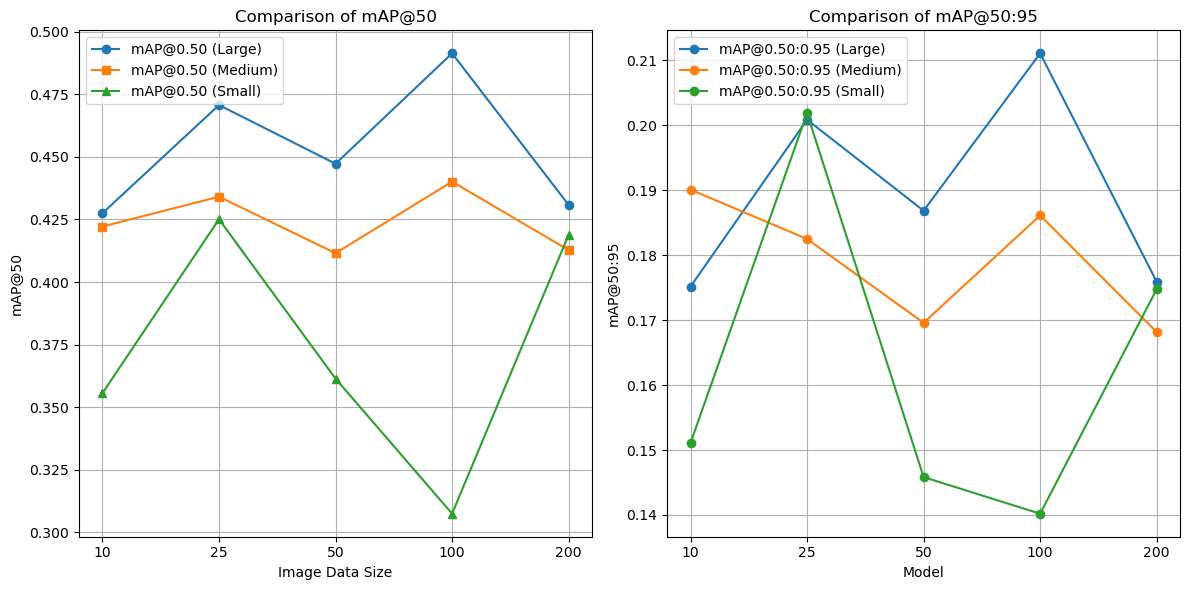

In [17]:

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['10', '25', '50', '100', '200']

# Plotting
plt.figure(figsize=(12, 6))

# mAP@0.50 Plot
plt.subplot(1, 2, 1)
plt.plot(df_l['mAP@50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@50'], '-^', label='mAP@0.50 (Small)')
plt.title('Comparison of mAP@50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot
plt.subplot(1, 2, 2)
plt.plot(df_l['mAP@50:95'], '-o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@50:95'], '-o', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@50:95'], '-o', label='mAP@0.50:0.95 (Small)')
plt.title('Comparison of mAP@50:95')
plt.xlabel('Model')
plt.ylabel('mAP@50:95')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


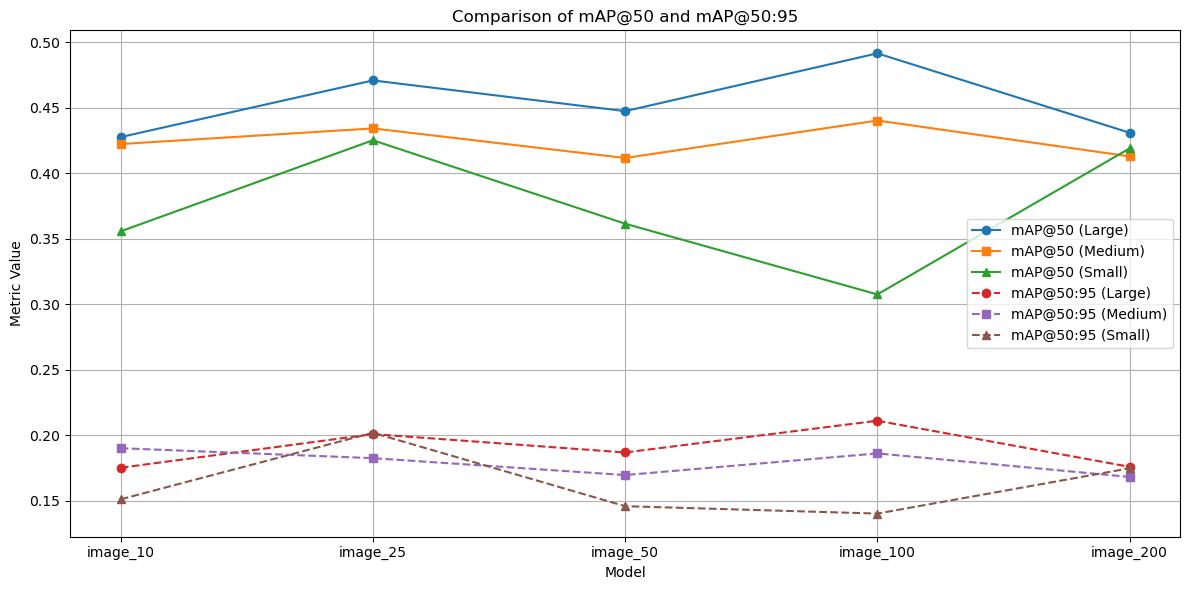

In [19]:

# Convert them to DataFrames
df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['image_10', 'image_25', 'image_50', 'image_100', 'image_200']

# Plotting
plt.figure(figsize=(12, 6))

# Plot for mAP@0.50
plt.plot(df_l['mAP@50'], '-o', label='mAP@50 (Large)')
plt.plot(df_m['mAP@50'], '-s', label='mAP@50 (Medium)')
plt.plot(df_s['mAP@50'], '-^', label='mAP@50 (Small)')

# Plot for mAP@0.50:0.95
plt.plot(df_l['mAP@50:95'], '--o', label='mAP@50:95 (Large)')
plt.plot(df_m['mAP@50:95'], '--s', label='mAP@50:95 (Medium)')
plt.plot(df_s['mAP@50:95'], '--^', label='mAP@50:95 (Small)')

# Setting the labels and title
plt.title('Comparison of mAP@50 and mAP@50:95')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
